In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import BatchNormalization

import numpy as np

tf.keras.backend.clear_session()

In [5]:
image_size = [512,512]
data_path = '/content/drive/MyDrive/ECE247/Brain_Tumor_Project/Harvard Medical Dataset2' #use correct data path

In [6]:
#Initial  BLock of the model
ini_input=keras.Input(shape=(512,512,3),name="image")

x1=layers.Conv2D(64,(22,22),strides=2)(ini_input)
x1=layers.MaxPooling2D((4,4))(x1)
x1=layers.BatchNormalization()(x1)

x2=layers.Conv2D(128,(11,11),strides=2,padding="same")(x1)
x2=layers.MaxPooling2D((2,2))(x2)
x2=layers.BatchNormalization()(x2)

x3=layers.Conv2D(256,(7,7),strides=2,padding="same")(x2)
x3=layers.MaxPooling2D((2,2))(x3)
x3=layers.BatchNormalization()(x3)

x4=layers.Conv2D(512,(3,3),strides=2,padding="same")(x3)
x4=layers.MaxPooling2D((2,2))(x4)
x4=layers.BatchNormalization()(x4)

x5=layers.GlobalAveragePooling2D()(x4)
x5=layers.Activation("relu")(x5)

x6=layers.Dense(1024,"relu")(x5)
x6=layers.BatchNormalization()(x6)
x7=layers.Dense(512,"relu")(x6)
x7=layers.BatchNormalization()(x7)
x8=layers.Dense(256,"relu")(x7)
x8=layers.BatchNormalization()(x8)
x8=layers.Dropout(.2)(x8)
x9=layers.Dense(2)(x8)
pred=layers.Activation("softmax")(x9)

model=keras.Model(inputs=ini_input,outputs=pred)

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image (InputLayer)          [(None, 512, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 246, 246, 64)      92992     
                                                                 
 max_pooling2d (MaxPooling2  (None, 61, 61, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 61, 61, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 128)       991360    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 128)       0     

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(
    rescale=1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    vertical_flip=True,
    validation_split=0.2)

train_generator=train_datagen.flow_from_directory(data_path, target_size=(224,224), color_mode='rgb', shuffle=True, subset='training', batch_size=10, class_mode='categorical')
val_generator = train_datagen.flow_from_directory(data_path, target_size=(224,224), color_mode='rgb', shuffle=True, subset='validation', batch_size=10, class_mode='categorical')

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ECE247/Brain_Tumor_Project/Harvard Medical Dataset2'

In [9]:
print(train_generator.n)
print(train_generator.batch_size)
print(242//32)

NameError: name 'train_generator' is not defined

In [10]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, epochs=80,  verbose=1, validation_data=val_generator)

NameError: name 'train_generator' is not defined

NameError: name 'history' is not defined

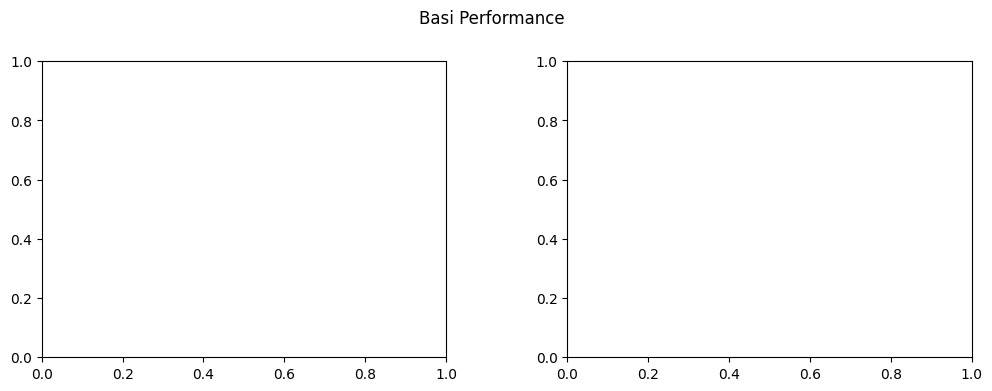

In [ ]:
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basi Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(0,80))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 80, 4))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 80, 4))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
#model.save('/content/drive/MyDrive/Brain_MRI2/my_bad_model.h5')